### Test LinUCB and ThresholdBandit

In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

from lib.bandits import LinUCB, ThresholdBandit 
from lib.generator import LinearGeneratorParams, LinearGenerator
import numpy as np 

import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
def first_nonzero(arr, axis, invalid_val=-1):
    mask = arr!=0
    return np.where(mask.any(axis=axis), mask.argmax(axis=axis), invalid_val)

In [3]:
alphas = (0, 2)
betas = (1, 0)
params = LinearGeneratorParams(alphas, betas)
generator = LinearGenerator(params)

### LinUCB 

In [4]:
linucb = LinUCB(generator)
for i in range(4000):
	(ctx, arm_idx, obs, regret) = linucb.step()

theta = np.dot(np.linalg.inv(linucb.V), linucb.U)
print(theta)

[[ 0.03067134]
 [ 1.95555046]
 [ 0.99554974]
 [ 0.01833374]]


In [32]:
#Make plots of LinUCB confidence interval
N = 100
xvals = np.linspace(-0.5, 1.5, N)
preds = np.zeros((N, 2))
preds_up = np.zeros((N, 2))
preds_low = np.zeros((N, 2))
for arm_idx in range(2):
    for i in range(N):
        preds[i,arm_idx] = linucb.predict(xvals[i], arm_idx)
        preds_up[i,arm_idx] = linucb.predict_upper(xvals[i], arm_idx)
        preds_low[i,arm_idx] = linucb.predict_lower(xvals[i], arm_idx)

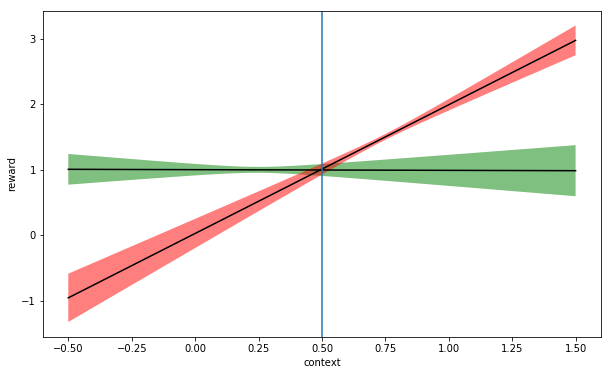

In [33]:
plt.fill_between(xvals, preds_low[:,0], preds_up[:,0], facecolor='green', alpha = 0.5)
plt.plot(xvals, preds[:,0], color='black')

plt.fill_between(xvals, preds_low[:,1], preds_up[:,1], facecolor='red', alpha = 0.5)
plt.plot(xvals, preds[:,1], color='black')

plt.axvline(x = 0.5)

plt.xlabel('context')
plt.ylabel('reward')

### Threshold bandit

In [4]:
threshold = 0.8
thresholdbandit = ThresholdBandit(generator, threshold)
print thresholdbandit.threshold
#Step through a bunch of times
for i in range(4000):
    (ctx, arm_idx, obs, regret) = thresholdbandit.step()
    thr = thresholdbandit.threshold
    lb = thresholdbandit.lower_bound
    ub = thresholdbandit.upper_bound
    print("i:%d,ctx:%f,arm:%d,rew:%f,regret:%f,thr:%f,lb:%f,ub:%f"%(i, ctx, arm_idx, obs, regret, thr, lb, ub))

theta = np.dot(np.linalg.inv(linucb.V), linucb.U)
print(theta)

0.8
0.0 0.0
0.0 0.0
i:0,ctx:0.735424,arm:0,rew:0.882159,regret:0.470849,thr:0.000000,lb:0.000000,ub:0.000000
0.0 0.0
0.0 0.0
i:1,ctx:0.018035,arm:1,rew:-0.071285,regret:0.963931,thr:0.000000,lb:0.000000,ub:0.000000
0.0 0.0
0.0 0.0
i:2,ctx:0.068815,arm:1,rew:0.179189,regret:0.862370,thr:0.000000,lb:0.000000,ub:0.000000
0.0 0.0
0.0 0.0
i:3,ctx:0.303608,arm:1,rew:0.630730,regret:0.392784,thr:0.000000,lb:0.000000,ub:0.000000
0.0 0.0
0.0 0.0
i:4,ctx:0.841675,arm:1,rew:1.687735,regret:0.000000,thr:0.000000,lb:0.000000,ub:0.000000
0.0 0.0
0.0 0.0
i:5,ctx:0.216574,arm:1,rew:0.340839,regret:0.566852,thr:0.000000,lb:0.000000,ub:0.000000
0.0 0.0
0.0 0.0
i:6,ctx:0.342174,arm:1,rew:0.676189,regret:0.315651,thr:0.000000,lb:0.000000,ub:0.000000
0.0 0.0
0.0 0.0
i:7,ctx:0.572587,arm:1,rew:1.285773,regret:0.000000,thr:0.000000,lb:0.000000,ub:0.000000
0.0 0.0
0.0 0.0
i:8,ctx:0.258636,arm:1,rew:0.583657,regret:0.482729,thr:0.000000,lb:0.000000,ub:0.000000
0.0 0.0
0.0 0.0
i:9,ctx:0.340272,arm:1,rew:0.65170

0.0 0.0
0.0 0.0
i:80,ctx:0.429011,arm:1,rew:0.960963,regret:0.141978,thr:0.000000,lb:0.000000,ub:0.000000
0.0 0.0
0.0 0.0
i:81,ctx:0.207368,arm:1,rew:0.427430,regret:0.585264,thr:0.000000,lb:0.000000,ub:0.000000
0.0 0.0
0.0 0.0
i:82,ctx:0.503217,arm:1,rew:1.056642,regret:0.000000,thr:0.000000,lb:0.000000,ub:0.000000
0.0 0.0
0.0 0.0
i:83,ctx:0.887162,arm:1,rew:1.810443,regret:0.000000,thr:0.000000,lb:0.000000,ub:0.000000
0.0 0.0
0.0 0.0
i:84,ctx:0.009760,arm:1,rew:-0.003566,regret:0.980479,thr:0.000000,lb:0.000000,ub:0.000000
0.0 0.0
0.0 0.0
i:85,ctx:0.588327,arm:1,rew:1.159748,regret:0.000000,thr:0.000000,lb:0.000000,ub:0.000000
0.0 0.0
0.0 0.0
i:86,ctx:0.022559,arm:1,rew:-0.064586,regret:0.954882,thr:0.000000,lb:0.000000,ub:0.000000
0.0 0.0
0.0 0.0
i:87,ctx:0.662011,arm:1,rew:1.481013,regret:0.000000,thr:0.000000,lb:0.000000,ub:0.000000
0.0 0.0
0.0 0.0
i:88,ctx:0.286124,arm:1,rew:0.282959,regret:0.427753,thr:0.000000,lb:0.000000,ub:0.000000
0.0 0.0
0.0 0.0
i:89,ctx:0.511659,arm:1,rew:

0.0 0.0
0.0 0.0
i:160,ctx:0.568405,arm:1,rew:1.029706,regret:0.000000,thr:0.000000,lb:0.000000,ub:0.000000
0.0 0.0
0.0 0.0
i:161,ctx:0.816594,arm:1,rew:1.581250,regret:0.000000,thr:0.000000,lb:0.000000,ub:0.000000
0.0 0.0
0.0 0.0
i:162,ctx:0.068920,arm:1,rew:0.208705,regret:0.862160,thr:0.000000,lb:0.000000,ub:0.000000
0.0 0.0
0.0 0.0
i:163,ctx:0.419694,arm:1,rew:0.813137,regret:0.160612,thr:0.000000,lb:0.000000,ub:0.000000
0.0 0.0
0.0 0.0
i:164,ctx:0.429166,arm:1,rew:0.809027,regret:0.141668,thr:0.000000,lb:0.000000,ub:0.000000
0.0 0.0
0.0 0.0
i:165,ctx:0.699917,arm:1,rew:1.458157,regret:0.000000,thr:0.000000,lb:0.000000,ub:0.000000
0.0 0.0
0.0 0.0
i:166,ctx:0.717820,arm:1,rew:1.461398,regret:0.000000,thr:0.000000,lb:0.000000,ub:0.000000
0.0 0.0
0.0 0.0
i:167,ctx:0.075663,arm:1,rew:0.312643,regret:0.848675,thr:0.000000,lb:0.000000,ub:0.000000
0.0 0.0
0.0 0.0
i:168,ctx:0.087876,arm:1,rew:0.132623,regret:0.824249,thr:0.000000,lb:0.000000,ub:0.000000
0.0 0.0
0.0 0.0
i:169,ctx:0.085789,ar

KeyboardInterrupt: 

In [7]:
#Make plots of LinUCB confidence interval
N = 100
xvals = np.linspace(-0.5, 1.5, N)
preds = np.zeros((N, 2))
preds_up = np.zeros((N, 2))
preds_low = np.zeros((N, 2))
for arm_idx in range(2):
    for i in range(N):
        preds[i,arm_idx] = thresholdbandit.predict(xvals[i], arm_idx)
        preds_up[i,arm_idx] = thresholdbandit.predict_upper(xvals[i], arm_idx)
        preds_low[i,arm_idx] = thresholdbandit.predict_lower(xvals[i], arm_idx)

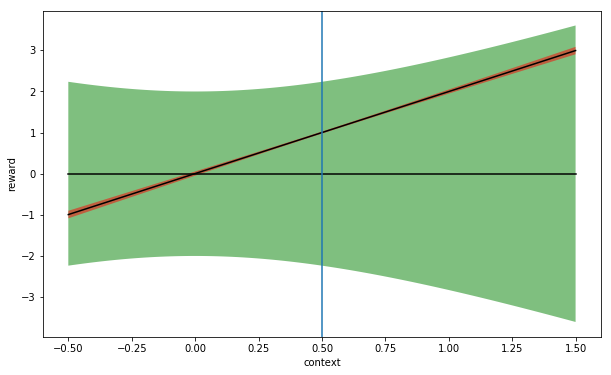

In [8]:
plt.fill_between(xvals, preds_low[:,0], preds_up[:,0], facecolor='green', alpha = 0.5)
plt.plot(xvals, preds[:,0], color='black')

plt.fill_between(xvals, preds_low[:,1], preds_up[:,1], facecolor='red', alpha = 0.5)
plt.plot(xvals, preds[:,1], color='black')

plt.axvline(x = 0.5)

plt.xlabel('context')
plt.ylabel('reward')